# Introduction to neural network classification with TensorFlow

Classification problem is where you try do classify something as one thing or another. There are 3 types of classification:
* Binary classification - input can be one of 2 classes
* Multiclass classification - input can be one of multiple classes
* Multilabel classification - input can apply to multiple classes

## Creating data to view and fit

In [28]:
from sklearn.datasets import make_circles

# Make 1000 examples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples, noise=0.03, random_state=42)

X[:5]

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       [-0.39373073,  0.69288277],
       [ 0.44220765, -0.89672343]])

In [29]:
y[:5]

array([1, 1, 1, 1, 0], dtype=int64)

Data is a little hard to understand, let's visualise it.

In [30]:
import pandas as pd
circles = pd.DataFrame({"X0": X[:, 0], "X1": X[:, 1] , "label":y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


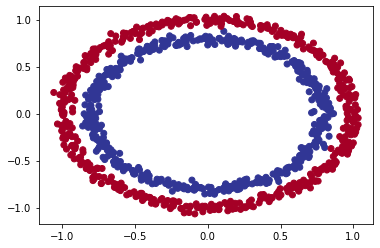

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu);

## Inputs and outputs

In [32]:
# Shapes
X.shape, y.shape

((1000, 2), (1000,))

## Steps in modeling

1. Create or import model
2. Compile the model
3. Fit the model
4. Evaluate the model
5. Tweak
6. Evaluate model
7. Repeat steps 5 and 6 until getting good results.

In [33]:
import tensorflow as tf

# Set the random seed
tf.random.set_seed(42)

# 1. Create the model using the Sequential API
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_1.compile(loss = "binary_crossentropy",
                optimizer="adam",
                metrics=["accuracy"]
               )

# 3. Fit the model
model_1.fit(X, y, epochs=5)

Epoch 1/5
32/32 [==============================] - 1s 5ms/step - loss: 4.2979 - accuracy: 0.4670
Epoch 2/5
32/32 [==============================] - 0s 5ms/step - loss: 4.2317 - accuracy: 0.4400
Epoch 3/5
32/32 [==============================] - 0s 5ms/step - loss: 4.1610 - accuracy: 0.4310
Epoch 4/5
32/32 [==============================] - 0s 5ms/step - loss: 4.1183 - accuracy: 0.4270
Epoch 5/5
32/32 [==============================] - 0s 5ms/step - loss: 4.0784 - accuracy: 0.4240


In [34]:
# Try to train for longer
model_1.fit(X, y, epochs=100)
model_1.evaluate(X, y)

Epoch 1/100
32/32 [==============================] - 0s 5ms/step - loss: 3.9453 - accuracy: 0.4180
Epoch 2/100
32/32 [==============================] - 0s 5ms/step - loss: 3.8490 - accuracy: 0.4130
Epoch 3/100
32/32 [==============================] - 0s 5ms/step - loss: 3.8109 - accuracy: 0.4140
Epoch 4/100
32/32 [==============================] - 0s 4ms/step - loss: 3.7889 - accuracy: 0.4190
Epoch 5/100
32/32 [==============================] - 0s 4ms/step - loss: 3.7606 - accuracy: 0.4200
Epoch 6/100
32/32 [==============================] - 0s 4ms/step - loss: 3.6154 - accuracy: 0.4340
Epoch 7/100
32/32 [==============================] - 0s 5ms/step - loss: 3.5476 - accuracy: 0.4430
Epoch 8/100
32/32 [==============================] - 0s 5ms/step - loss: 3.5266 - accuracy: 0.4460
Epoch 9/100
32/32 [==============================] - 0s 5ms/step - loss: 3.4879 - accuracy: 0.4490
Epoch 10/100
32/32 [==============================] - 0s 5ms/step - loss: 3.3497 - accuracy: 0.4510
Epoch 11/

32/32 [==============================] - 0s 4ms/step - loss: 0.7408 - accuracy: 0.4590
Epoch 84/100
32/32 [==============================] - 0s 4ms/step - loss: 0.7394 - accuracy: 0.4590
Epoch 85/100
32/32 [==============================] - 0s 4ms/step - loss: 0.7380 - accuracy: 0.4610
Epoch 86/100
32/32 [==============================] - 0s 5ms/step - loss: 0.7367 - accuracy: 0.4610
Epoch 87/100
32/32 [==============================] - 0s 5ms/step - loss: 0.7355 - accuracy: 0.4600
Epoch 88/100
32/32 [==============================] - 0s 5ms/step - loss: 0.7342 - accuracy: 0.4600
Epoch 89/100
32/32 [==============================] - 0s 5ms/step - loss: 0.7330 - accuracy: 0.4590
Epoch 90/100
32/32 [==============================] - 0s 5ms/step - loss: 0.7318 - accuracy: 0.4580
Epoch 91/100
32/32 [==============================] - 0s 5ms/step - loss: 0.7306 - accuracy: 0.4600
Epoch 92/100
32/32 [==============================] - 0s 5ms/step - loss: 0.7295 - accuracy: 0.4610
Epoch 93/100


[0.7205846905708313, 0.45899999141693115]

Accuray ~50% meand model is just guessing. Let's add extra layer.

In [35]:
# set random seed
tf.random.set_seed(42)

# 1. Create a model using seqential API
model_2 = tf.keras.Sequential([
     tf.keras.layers.Dense(100, activation="relu"),
     tf.keras.layers.Dense(1)
 ])
    
model_2.compile(loss="binary_crossentropy",
             optimizer="adam",
             metrics=["accuracy"])

model_2.fit(X, y, epochs=50)

Epoch 1/50
32/32 [==============================] - 1s 5ms/step - loss: 1.1985 - accuracy: 0.4650
Epoch 2/50
32/32 [==============================] - 0s 6ms/step - loss: 0.7864 - accuracy: 0.3450
Epoch 3/50
32/32 [==============================] - 0s 5ms/step - loss: 0.7620 - accuracy: 0.3710
Epoch 4/50
32/32 [==============================] - 0s 5ms/step - loss: 0.7492 - accuracy: 0.2530
Epoch 5/50
32/32 [==============================] - 0s 6ms/step - loss: 0.7406 - accuracy: 0.3050
Epoch 6/50
32/32 [==============================] - 0s 5ms/step - loss: 0.7307 - accuracy: 0.3210
Epoch 7/50
32/32 [==============================] - 0s 5ms/step - loss: 0.7236 - accuracy: 0.1550
Epoch 8/50
32/32 [==============================] - 0s 5ms/step - loss: 0.7148 - accuracy: 0.2900
Epoch 9/50
32/32 [==============================] - 0s 4ms/step - loss: 0.7048 - accuracy: 0.3900
Epoch 10/50
32/32 [==============================] - 0s 4ms/step - loss: 0.6954 - accuracy: 0.4720
Epoch 11/50
32/32 [

In [36]:
# Make train and test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
# Make another model and train it on a train data set
# set random seed
tf.random.set_seed(42)

# 1. Create a model using seqential API
model_3 = tf.keras.Sequential([
     tf.keras.layers.Dense(8, activation="relu"),
     tf.keras.layers.Dense(8, activation="relu"),
     tf.keras.layers.Dense(1, activation="sigmoid")
 ])
    
model_3.compile(loss="binary_crossentropy",
             optimizer="adam",
             metrics=["accuracy"])

history = model_3.fit(X_train, y_train, epochs=100)

Epoch 1/100
25/25 [==============================] - 0s 4ms/step - loss: 0.6938 - accuracy: 0.5038
Epoch 2/100
25/25 [==============================] - 0s 4ms/step - loss: 0.6858 - accuracy: 0.5125
Epoch 3/100
25/25 [==============================] - 0s 4ms/step - loss: 0.6823 - accuracy: 0.5250
Epoch 4/100
25/25 [==============================] - 0s 4ms/step - loss: 0.6803 - accuracy: 0.5312
Epoch 5/100
25/25 [==============================] - 0s 4ms/step - loss: 0.6779 - accuracy: 0.6062
Epoch 6/100
25/25 [==============================] - 0s 4ms/step - loss: 0.6761 - accuracy: 0.5650
Epoch 7/100
25/25 [==============================] - 0s 4ms/step - loss: 0.6742 - accuracy: 0.5763
Epoch 8/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6724 - accuracy: 0.5775
Epoch 9/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6708 - accuracy: 0.5675
Epoch 10/100
25/25 [==============================] - 0s 4ms/step - loss: 0.6688 - accuracy: 0.5725
Epoch 11/

25/25 [==============================] - 0s 4ms/step - loss: 0.1223 - accuracy: 0.9987
Epoch 84/100
25/25 [==============================] - 0s 3ms/step - loss: 0.1179 - accuracy: 1.0000
Epoch 85/100
25/25 [==============================] - 0s 3ms/step - loss: 0.1141 - accuracy: 0.9987
Epoch 86/100
25/25 [==============================] - 0s 3ms/step - loss: 0.1102 - accuracy: 0.9987
Epoch 87/100
25/25 [==============================] - 0s 4ms/step - loss: 0.1065 - accuracy: 1.0000
Epoch 88/100
25/25 [==============================] - 0s 4ms/step - loss: 0.1032 - accuracy: 1.0000
Epoch 89/100
25/25 [==============================] - 0s 4ms/step - loss: 0.1004 - accuracy: 1.0000
Epoch 90/100
25/25 [==============================] - 0s 5ms/step - loss: 0.0973 - accuracy: 1.0000
Epoch 91/100
25/25 [==============================] - 0s 4ms/step - loss: 0.0932 - accuracy: 1.0000
Epoch 92/100
25/25 [==============================] - 0s 4ms/step - loss: 0.0907 - accuracy: 1.0000
Epoch 93/100


In [38]:
model_3.evaluate(X_test, y_test);

7/7 [==============================] - 0s 3ms/step - loss: 0.0981 - accuracy: 1.0000


## Visualizating predictions 

To visualise model's predictions, I'll create a function `plot_decision_boundary()`, it will:
* Take in a trained model, features (X) and labels (y)
* Create a meshgrid of different X values
* Make prediction across the meshgrid
* Plot the predictions as well as a line between zones (where each unique class falls)

In [39]:
import numpy as np

def plot_decision_boundary(model, X, y):
    """
    Plots the decision boundary created by a model predicting on X.
    """
    # Define the axis boundary created of the plot and create a meshgrid
    x_min, x_max = X[:,0].min() - 0.1, X[:,0].max() + 0.1
    y_min, y_max = X[:,1].min() - 0.1, X[:,1].max() + 0.1

    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                        np.linspace(y_min, y_max, 100))
    
    # Create X value (we're going to make prediction on these)
    x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together
    
    # Make predictions
    y_pred = model.predict(x_in)
    
    # Check for multi-class
    if len(y_pred[0]) > 1:
        print("Doing multiclass classification")
        # we have to reshape our prediction to get them ready for ploting
        y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
    else:
        print("Doing binary classification")
        y_pred = np.round(y_pred).reshape(xx.shape)
        
    # Plot the decision boundry
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu, marker=".")
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

Doing binary classification


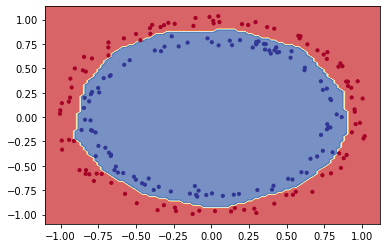

In [40]:
# Check out the predictions our model is making
plot_decision_boundary(model=model_3,
                      X=X_test,
                      y=y_test)

## Implementing non-linear and linear functions

In [41]:
# Create a toy tensor
A = tf.cast(tf.range(-10, 10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

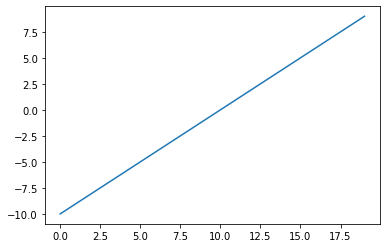

In [42]:
plt.plot(A);

In [43]:
# sigmoid
def my_sigmoid(x):
    return 1/(1 + tf.exp(-x))

# Use my_sigmoid function on toy tensor
my_sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397868e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726230e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105854e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

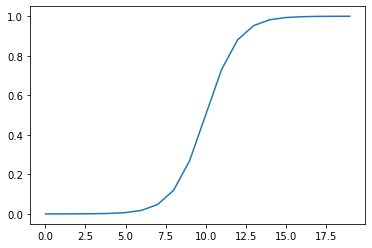

In [44]:
plt.plot(my_sigmoid(A));

In [45]:
# ReLU
def my_relu(x):
    return tf.maximum(0, x)

# use my_relu on toy tensor
my_relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

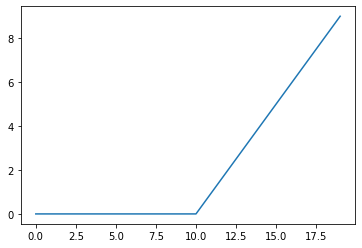

In [46]:
plt.plot(my_relu(A));

In [47]:
# linear activation function
def my_linear(x):
    return x # LOL

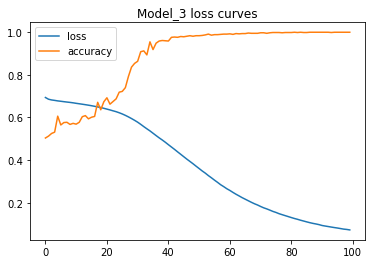

In [48]:
pd.DataFrame(history.history).plot()
plt.title("Model_3 loss curves");

## Finding the best learning rate
To find the ideal learning rate we are going to use following steps:
* A learining rate **callback**
* Another model
* A modified loss curves plot

In [86]:
# Make another model and train it on a train data set
# set random seed
tf.random.set_seed(42)

# 1. Create a model using seqential API
model_4 = tf.keras.Sequential([
     tf.keras.layers.Dense(6, activation="relu"),
     tf.keras.layers.Dense(6, activation="sigmoid"),
     tf.keras.layers.Dense(1, activation="sigmoid")
 ])
    
model_4.compile(loss="binary_crossentropy",
             optimizer="Adam",
             metrics=["accuracy"])

# Create a  learning rate callback

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

history = model_4.fit(X_train, y_train, epochs=100, callbacks=[lr_scheduler])

Epoch 1/100
25/25 [==============================] - 0s 4ms/step - loss: 0.7090 - accuracy: 0.5000
Epoch 2/100
25/25 [==============================] - 0s 4ms/step - loss: 0.7081 - accuracy: 0.5000
Epoch 3/100
25/25 [==============================] - 0s 4ms/step - loss: 0.7072 - accuracy: 0.5000
Epoch 4/100
25/25 [==============================] - 0s 4ms/step - loss: 0.7063 - accuracy: 0.5000
Epoch 5/100
25/25 [==============================] - 0s 4ms/step - loss: 0.7052 - accuracy: 0.5000
Epoch 6/100
25/25 [==============================] - 0s 4ms/step - loss: 0.7042 - accuracy: 0.5000
Epoch 7/100
25/25 [==============================] - 0s 4ms/step - loss: 0.7031 - accuracy: 0.5000
Epoch 8/100
25/25 [==============================] - 0s 4ms/step - loss: 0.7020 - accuracy: 0.5000
Epoch 9/100
25/25 [==============================] - 0s 4ms/step - loss: 0.7009 - accuracy: 0.5000
Epoch 10/100
25/25 [==============================] - 0s 4ms/step - loss: 0.6999 - accuracy: 0.5000
Epoch 11/

25/25 [==============================] - 0s 4ms/step - loss: 0.9439 - accuracy: 0.4963
Epoch 84/100
25/25 [==============================] - 0s 4ms/step - loss: 0.8851 - accuracy: 0.4888
Epoch 85/100
25/25 [==============================] - 0s 4ms/step - loss: 0.7404 - accuracy: 0.5200
Epoch 86/100
25/25 [==============================] - 0s 4ms/step - loss: 0.7716 - accuracy: 0.4875
Epoch 87/100
25/25 [==============================] - 0s 5ms/step - loss: 0.8029 - accuracy: 0.4875
Epoch 88/100
25/25 [==============================] - 0s 4ms/step - loss: 0.8211 - accuracy: 0.5063
Epoch 89/100
25/25 [==============================] - 0s 4ms/step - loss: 0.8115 - accuracy: 0.5113
Epoch 90/100
25/25 [==============================] - 0s 4ms/step - loss: 1.0421 - accuracy: 0.5088
Epoch 91/100
25/25 [==============================] - 0s 4ms/step - loss: 0.7931 - accuracy: 0.5038
Epoch 92/100
25/25 [==============================] - 0s 3ms/step - loss: 0.8067 - accuracy: 0.5225
Epoch 93/100


<AxesSubplot:>

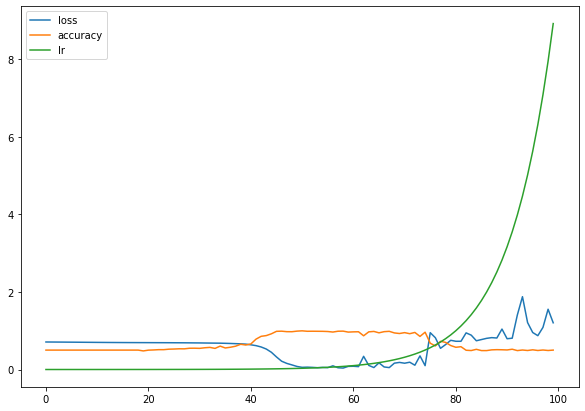

In [87]:
pd.DataFrame(history.history).plot(figsize=(10,7))

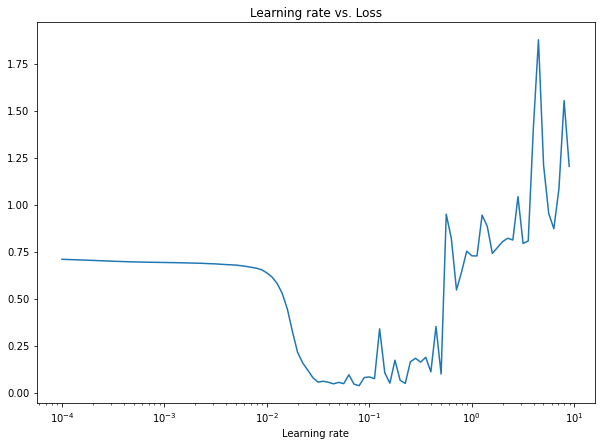

In [88]:
# PLot the learning rate vs the loss
lrs = 1e-4 *(10 ** (tf.range(100)/20))
hist_df = pd.DataFrame(history.history)
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, hist_df.loss)
plt.xlabel("Learning rate")
plt.title("Learning rate vs. Loss");

In [72]:
hist_df.loss

0     0.706840
1     0.706078
2     0.705281
3     0.704519
4     0.703542
        ...   
95    2.224789
96    2.551236
97    2.211608
98    5.098989
99    6.858326
Name: loss, Length: 100, dtype: float64

In [103]:
# set random seed
tf.random.set_seed(42)

# 1. Create a model using seqential API
model_5 = tf.keras.Sequential([
     tf.keras.layers.Dense(6, activation="relu"),
     tf.keras.layers.Dense(6, activation="sigmoid"),
     tf.keras.layers.Dense(1, activation="sigmoid")
 ])
    
model_5.compile(loss="binary_crossentropy",
             optimizer=tf.keras.optimizers.Adam(learning_rate=0.006),
             metrics=["accuracy"])

history = model_5.fit(X_train, y_train, epochs=55)

Epoch 1/55
25/25 [==============================] - 0s 4ms/step - loss: 0.6969 - accuracy: 0.4913
Epoch 2/55
25/25 [==============================] - 0s 4ms/step - loss: 0.6919 - accuracy: 0.5163
Epoch 3/55
25/25 [==============================] - 0s 4ms/step - loss: 0.6889 - accuracy: 0.5387
Epoch 4/55
25/25 [==============================] - 0s 4ms/step - loss: 0.6880 - accuracy: 0.5800
Epoch 5/55
25/25 [==============================] - 0s 4ms/step - loss: 0.6849 - accuracy: 0.5263
Epoch 6/55
25/25 [==============================] - 0s 4ms/step - loss: 0.6816 - accuracy: 0.5575
Epoch 7/55
25/25 [==============================] - 0s 4ms/step - loss: 0.6786 - accuracy: 0.5763
Epoch 8/55
25/25 [==============================] - 0s 4ms/step - loss: 0.6757 - accuracy: 0.5738
Epoch 9/55
25/25 [==============================] - 0s 4ms/step - loss: 0.6744 - accuracy: 0.5775
Epoch 10/55
25/25 [==============================] - 0s 4ms/step - loss: 0.6702 - accuracy: 0.5825
Epoch 11/55
25/25 [

Doing binary classification


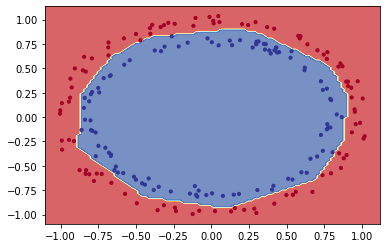

In [105]:
# Check out the predictions our model is making
plot_decision_boundary(model=model_5,
                      X=X_test,
                      y=y_test)

In [104]:
model_5.evaluate(X_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.0702 - accuracy: 1.0000


[0.07020769268274307, 1.0]

## CLassification evaluation results

* Accuracy
* Precision
* Recall
* F1-score
* Confusion matrix
* CLassification report

In [108]:
# Check the accuracy of our model, and make preds
y_preds = model_5.predict(X_test)
loss, accuracy = model_5.evaluate(X_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.0702 - accuracy: 1.0000


Confusion matrix

In [109]:
y_preds

array([[0.99604344],
       [0.05177023],
       [0.99230677],
       [0.01206905],
       [0.84407955],
       [0.91895086],
       [0.03016664],
       [0.01762038],
       [0.97568715],
       [0.04049525],
       [0.39399174],
       [0.9928905 ],
       [0.00699343],
       [0.9241245 ],
       [0.29711258],
       [0.9934503 ],
       [0.98147297],
       [0.01818541],
       [0.9928785 ],
       [0.04014811],
       [0.02289088],
       [0.01005844],
       [0.978143  ],
       [0.0046359 ],
       [0.03598233],
       [0.09289294],
       [0.05587485],
       [0.05225936],
       [0.05363315],
       [0.99621457],
       [0.99281377],
       [0.02115156],
       [0.19587019],
       [0.9734996 ],
       [0.02638122],
       [0.99042624],
       [0.6265654 ],
       [0.943029  ],
       [0.91158694],
       [0.9776919 ],
       [0.9332673 ],
       [0.90786624],
       [0.9906115 ],
       [0.01566474],
       [0.03207301],
       [0.9873749 ],
       [0.07886999],
       [0.007

We have to convert predictions to binary form.

In [113]:
y_bin = np.round(y_preds, decimals=0).astype("int32")

In [115]:
from sklearn.metrics import confusion_matrix
conf_mat = pd.DataFrame(confusion_matrix(y_test, y_bin))

In [116]:
conf_mat

,0,1
0,100,0
1,0,100


In [118]:
import itertools

def make_conf_matrix(y_true, y_pred, classes=None, figsize=(10,10), text_size = 15):
    from sklearn.metrics import confusion_matrix
    # Create the confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]
    n_classes = cm.shape[0]
    # Let's prettify it
    fig, ax = plt.subplots(figsize=figsize)
    # Create a matrix plot
    cax = ax.matshow(cm, cmap=plt.cm.Blues)
    fig.colorbar(cax)

   
    if classes:
        labels = classes
    else:
        labels = np.arange(cm.shape[0])

    # Label the axes
    ax.set(title="Confusion matrix",
           xlabel="Predicted Labels",
           ylabel="True Label",
           xticks=np.arange(n_classes),
           yticks=np.arange(n_classes),
           xticklabels=labels,
           yticklabels=labels
    );

    # Set x-axis labels to bottom
    ax.xaxis.set_label_position("bottom")
    ax.xaxis.tick_bottom()

    # Adjust labels size
    ax.yaxis.label.set_size(text_size + 10)
    ax.xaxis.label.set_size(text_size + 10)
    ax.title.set_size(text_size+10)

    # Change labels color
    ax.xaxis.label.set_color("whitesmoke")
    ax.yaxis.label.set_color("whitesmoke")


    # Set threshold for different colors
    threshold = (cm.max() + cm.min()) /2

    # PLot the text on each cell

    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
                horizontalalignment="center",
                color="white" if cm[i,j] > threshold else "black",
                size=text_size)


## Wotking with a larger example (multiclass classification)

In [41]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

# The data has already beed stored into training and test sets
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [42]:
# show the first training example
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [43]:
# Check the shape of single example
X_train[0].shape

(28, 28)

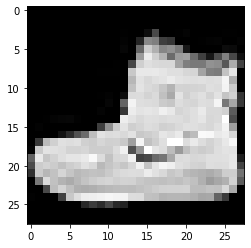

In [44]:
# Plot a single sample
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(X_train[0], cmap='gray', vmin=0, vmax=255);

In [45]:
# Check out samples label
y_train[0]

9

In [46]:
# Create a small list with labels as strings in human readable form
labels = ["T-shirt/top", "Trouser", "Pullover",
          "Dress", "Coat", "Sandal", "Shirt",
          "Sneaker", "Bag", "Ankle boot"]

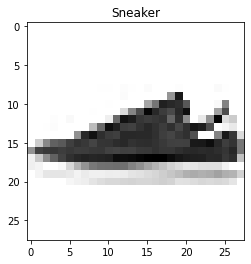

In [47]:
# Now plot image with title
index = 6
plt.imshow(X_train[index], cmap=plt.cm.binary)
plt.title(labels[y_train[index]]);

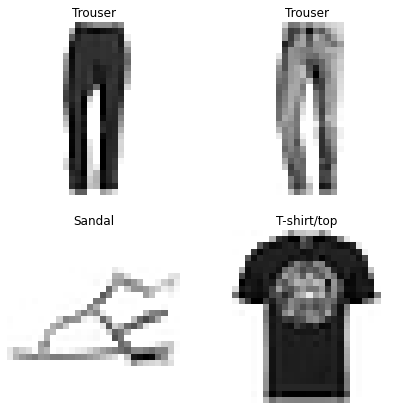

In [48]:
# PLot multiple random images
import random

plt.figure(figsize=(7,7))
for i in range(4):
    ax = plt.subplot(2,2, i+1)
    rand_idx = random.choice(range(len(X_train)))
    plt.imshow(X_train[rand_idx], cmap=plt.cm.binary)
    plt.title(labels[y_train[rand_idx]])
    plt.axis(False)
    

## Building bulticlass classification model

In [60]:
# Define input, output shapes and loss
input_shape = X_train[0].shape
output_shape = 10
loss = tf.keras.losses.SparseCategoricalCrossentropy() # CategoricalCrossentropy() expexts one hot encoded labels

In [49]:

# set random state
tf.random.set_seed(42)

# create a model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Flatten(), # Need to flatten images from 28x28 matrix to vector
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(output_shape, activation="softmax"),
])

# Compile the model
model_1.compile(loss=loss,
               optimizer="adam",
               metrics=["accuracy"])

# Fit the model
history_1 = model_1.fit(X_train, y_train,
                        epochs=10,
                        validation_data=(X_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 2.1806 - accuracy: 0.1593 - val_loss: 1.8164 - val_accuracy: 0.2065
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 1.7143 - accuracy: 0.2436 - val_loss: 1.6538 - val_accuracy: 0.2836
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 1.6341 - accuracy: 0.2814 - val_loss: 1.6034 - val_accuracy: 0.2793
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 1.6040 - accuracy: 0.2860 - val_loss: 1.6026 - val_accuracy: 0.2978
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 1.5899 - accuracy: 0.3003 - val_loss: 1.5707 - val_accuracy: 0.3190
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 1.5416 - accuracy: 0.3411 - val_loss: 1.5048 - val_accuracy: 0.3583
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 1.5055 - accuracy: 0.3580 - val_loss: 1.4832 - val_accuracy:

In [50]:
# One hot encoding labels
y_train_onehot = tf.one_hot(y_train, depth=output_shape)
y_test_onehot = tf.one_hot(y_test, depth=output_shape)

In [51]:
# Trying the same model on one hot encode labels to check for improvement
# set random state
tf.random.set_seed(42)

# create a model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(), # Need to flatten images from 28x28 matrix to vector
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(output_shape, activation="softmax"),
])

# Compile the model
model_2.compile(loss=loss,
               optimizer="adam",
               metrics=["accuracy"])

# Fit the model
history_2 = model_2.fit(X_train, y_train_onehot,
                        epochs=10,
                        validation_data=(X_test, y_test_onehot))

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 2.1806 - accuracy: 0.1593 - val_loss: 1.8164 - val_accuracy: 0.2065
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 1.7143 - accuracy: 0.2436 - val_loss: 1.6538 - val_accuracy: 0.2836
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 1.6341 - accuracy: 0.2814 - val_loss: 1.6034 - val_accuracy: 0.2793
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 1.6040 - accuracy: 0.2860 - val_loss: 1.6026 - val_accuracy: 0.2978
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 1.5899 - accuracy: 0.3003 - val_loss: 1.5707 - val_accuracy: 0.3190
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 1.5416 - accuracy: 0.3411 - val_loss: 1.5048 - val_accuracy: 0.3583
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 1.5055 - accuracy: 0.3580 - val_loss: 1.4832 - val_accuracy:

In [52]:
# Check the min and max values of the training data
X_train.min(), X_train.max()

(0, 255)

In [53]:
# Let's normalize it to numbers between 0 and 1. NNs like input in that format.
# It can be achieved by dividing all numbers by the maximum
X_train = X_train/X_train.max()
X_test = X_test/X_test.max()

In [55]:
# Train model on normalized data sets, no hot-encoded labels since those are not giving any better results.
# set random state
tf.random.set_seed(42)

# create a model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(), # Need to flatten images from 28x28 matrix to vector
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(output_shape, activation="softmax"),
])

# Compile the model
model_3.compile(loss=loss,
               optimizer="adam",
               metrics=["accuracy"])

# Fit the model
history_3 = model_3.fit(X_train, y_train,
                        epochs=10,
                        validation_data=(X_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.6376 - accuracy: 0.7757 - val_loss: 0.6400 - val_accuracy: 0.7820
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5942 - accuracy: 0.7914 - val_loss: 0.6247 - val_accuracy: 0.7783
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5750 - accuracy: 0.7979 - val_loss: 0.6078 - val_accuracy: 0.7881
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5641 - accuracy: 0.8006 - val_loss: 0.6169 - val_accuracy: 0.7881
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5544 - accuracy: 0.8043 - val_loss: 0.5855 - val_accuracy: 0.7951
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5488 - accuracy: 0.8063 - val_loss: 0.6097 - val_accuracy:

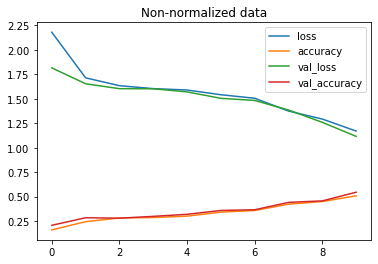

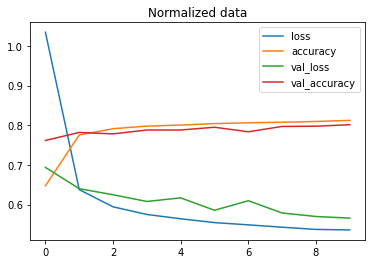

In [61]:
import pandas as pd
pd.DataFrame(history_1.history).plot();
plt.title("Non-normalized data")
pd.DataFrame(history_3.history).plot();
plt.title("Normalized data");

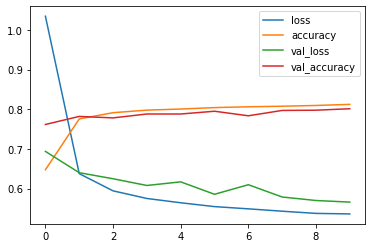

In [57]:
pd.DataFrame(history_3.history).plot();

Model is performing way better on normalized data.

### Finding ideal learning rate

In [81]:
n_epochs =40
# Set random seed
tf.random.set_seed(42)

# Create a model
model_4 = tf.keras.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

model_4.compile(loss=loss,
               optimizer="adam",
               metrics=["accuracy"])

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * (10 ** (epoch/20)))
                                                
history_4 = model_4.fit(X_train, y_train, epochs=n_epochs, validation_data=(X_test, y_test), callbacks=[lr_scheduler])                                               

Epoch 1/40
1875/1875 [==============================] - 8s 4ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/40
1875/1875 [==============================] - 7s 4ms/step - loss: 0.6366 - accuracy: 0.7759 - val_loss: 0.6400 - val_accuracy: 0.7808
Epoch 3/40
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5934 - accuracy: 0.7911 - val_loss: 0.6278 - val_accuracy: 0.7770
Epoch 4/40
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5749 - accuracy: 0.7969 - val_loss: 0.6122 - val_accuracy: 0.7871
Epoch 5/40
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5655 - accuracy: 0.7987 - val_loss: 0.6061 - val_accuracy: 0.7913
Epoch 6/40
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5569 - accuracy: 0.8022 - val_loss: 0.5917 - val_accuracy: 0.7940
Epoch 7/40
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5542 - accuracy: 0.8036 - val_loss: 0.5898 - val_accuracy:

In [82]:
lr_rates =  1e-3 * (10 ** (tf.range(n_epochs)/20))

Text(0, 0.5, 'Loss')

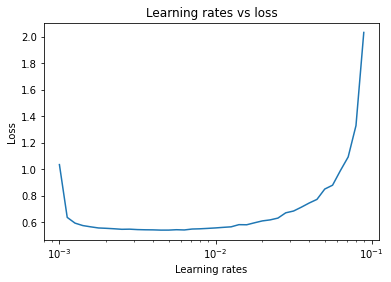

In [83]:
# PLot learning rates vs. loss
plt.semilogx(lr_rates, pd.DataFrame(history_4.history).loss)
plt.title("Learning rates vs loss")
plt.xlabel("Learning rates")
plt.ylabel("Loss")

Look like default learing rate (1e-3) is the best. I'll stick with it.

Let's do some tuning to achieve ~90% val_accuracy.

In [ ]:
# Let's tune it a little bit

# set random state
tf.random.set_seed(42)

# Create a model
model_5 = tf.keras.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(120, activation="relu"),
    tf.keras.layers.Dense(80, activation="relu"),
    tf.keras.layers.Dense(40, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

# Ccompile model
model_5.compile(loss=loss,
                optimizer="adam",
                metrics=["accuracy"]
               )

# Fit the model
model_5.fit(X_train, y_train, epochs=30, validation_data=(X_test, y_test))

In [101]:
model_5.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3979 - accuracy: 0.8877


[0.39794009923934937, 0.8877000212669373]

## Evaluating multiclass classification model

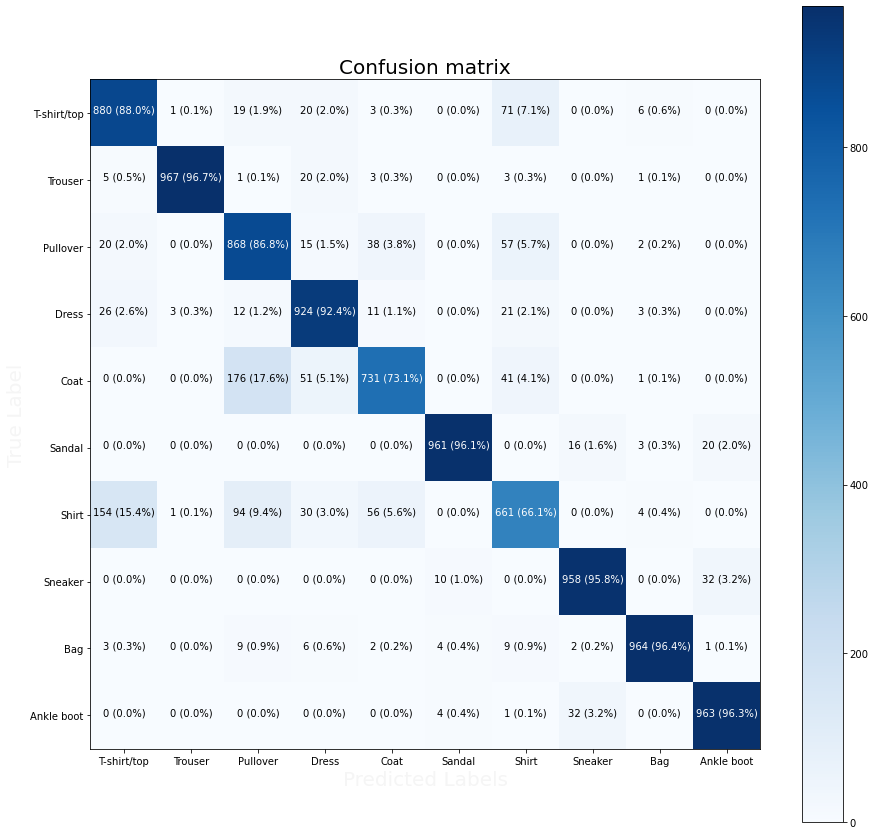

In [121]:
# Confusion matrix
y_pred = model_5.predict(X_test)
# Turn prediction into numbers of predicted classes
y_std = [np.argmax(pred) for pred in y_pred]
# PLot conf matrix
make_conf_matrix(y_test, y_std, classes=labels,figsize=(15,15), text_size=10)